In [2]:
import numpy as num
import matplotlib.pyplot as plt
from matplotlib import use
import pylab as lab
from scipy import constants
from matplotlib import rcParams
import os

from scipy.optimize import curve_fit

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/function")

import FDEAM as feam

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/")



#setting different parameteres
params = {
    'font.family':'serif',
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [5,5],
    'figure.max_open_warning': 0
   }
rcParams.update(params)
%matplotlib inline


In [2]:
def DumpExtractorIncomplete(filename,frames,atomNumber,atomPlate):

    
    """
infoDict=DumpExtractor(filename,frames,atomNumber,atomPlate)


Function that extracts the information from the .dump file created by openmd
    
    
    Inputs:
  ===========
   
   
   filename:
   
               Path of the dump file from which the information is to be extracted
               
    frame:
    
                Total number of frames in the dump file
                
    atomNumber:
        
                Totla number of atoms in the slab or crystal
                
    atomPlate:
    
                Total number of atoms in the capacitor plates



    Outputs:
 =============
 
 infoDict:
 
         Dictonary containing position, velocity, chargeQV, electricField, plateEQV.
         Postion is a list of [x,y,z] and each x,y,z are array of x[frames][sites]
         velocity is a list of [vx,vy,vz] and each vx,vy,vz are array of vx[frames][sites]
         chargeQV is a lisf of [c,cv] and each c and cv are array of c[frame][sites]
         electric field is list of [ex,ey,ez] and each are array of ex[frame][sites]
         plateEQV is the list of [pex,pey,pez,pc,pcv] and each are array of pex[frames][sites]
"""    
    fileDump=open(filename)  #dump file for info extraction
    linesDump=fileDump.readlines()
    
    
    
    processP="Wait"
    processC="Wait"
    fileComplete= True
    try:
    
        if(linesDump[-1]!="</OpenMD>\n"):
            print("Error: Incomplete file")
            fileComplete=False
            #sys.exit();


        #information storage matrix 
        #posiiton and velocity storage
        x=num.zeros((frames,atomNumber))
        y=num.zeros((frames,atomNumber))
        z=num.zeros((frames,atomNumber))
        vx=num.zeros((frames,atomNumber))
        vy=num.zeros((frames,atomNumber))
        vz=num.zeros((frames,atomNumber))


        #charge and velocity storage matrix
        c=num.zeros((frames,atomNumber))
        cv=num.zeros((frames,atomNumber))
        ex=num.zeros((frames,atomNumber))
        ey=num.zeros((frames,atomNumber))
        ez=num.zeros((frames,atomNumber))
        pc=num.zeros((frames,atomPlate))
        pcv=num.zeros((frames,atomPlate))
        pex=num.zeros((frames,atomPlate))
        pey=num.zeros((frames,atomPlate))
        pez=num.zeros((frames,atomPlate))

        #frame count initilization
        fCount=0
        index=0  #index for the atoms
        for line in linesDump:
            linesSplit=str.split(line)
            length=len(linesSplit)

            if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
                processP="Start"
                continue;

            elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
                processP="Wait"
                index=0
                continue;

            elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
                processC="Start"
                continue;

            elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
                fCount=fCount+1
                index=0;
                processC="Wait"
                continue;

            elif(fCount>=frames):
                break;

            else:
                processP=processP;
                processC=processC;



            if (processP=="Start"):
                x[fCount][int(linesSplit[0])]=float(linesSplit[2])
                y[fCount][int(linesSplit[0])]=float(linesSplit[3])
                z[fCount][int(linesSplit[0])]=float(linesSplit[4])
                vx[fCount][int(linesSplit[0])]=float(linesSplit[5])
                vy[fCount][int(linesSplit[0])]=float(linesSplit[6])
                vz[fCount][int(linesSplit[0])]=float(linesSplit[7])

            if(processC=="Start"):
                if int(linesSplit[0])<atomNumber:
                    c[fCount][int(linesSplit[0])]=float(linesSplit[3])
                    cv[fCount][int(linesSplit[0])]=float(linesSplit[4])
                    ex[fCount][int(linesSplit[0])]=float(linesSplit[5])
                    ey[fCount][int(linesSplit[0])]=float(linesSplit[6])
                    ez[fCount][int(linesSplit[0])]=float(linesSplit[7])
                elif (int(linesSplit[0])==atomNumber and linesSplit[1]=="cwe"):
                    continue
                    c[fCount][int(linesSplit[0])]=float(linesSplit[2])
                    cv[fCount][int(linesSplit[0])]=float(linesSplit[3])
                    ex[fCount][int(linesSplit[0])]=float(linesSplit[4])
                    ey[fCount][int(linesSplit[0])]=float(linesSplit[5])
                    ez[fCount][int(linesSplit[0])]=float(linesSplit[6])
                else:
                    pc[fCount][int(linesSplit[1])]=float(linesSplit[3])
                    pcv[fCount][int(linesSplit[1])]=float(linesSplit[4])
                    pex[fCount][int(linesSplit[1])]=float(linesSplit[5])
                    pey[fCount][int(linesSplit[1])]=float(linesSplit[6])
        position=[x,y,z]
        velocity=[vx,vy,vz]
        chargeQV=[c,cv]
        electricField=[ex,ey,ez]
        platesEQV=[pex,pey,pez,pc,pcv]

        infoDict={"position":position,"velocity":velocity,"chargeQV":chargeQV,"electricField":electricField,"platesEQV":platesEQV,"CFrame":fCount}
        return infoDict
    except:
        position=[x,y,z]
        velocity=[vx,vy,vz]
        chargeQV=[c,cv]
        electricField=[ex,ey,ez]
        platesEQV=[pex,pey,pez,pc,pcv]

        infoDict={"position":position,"velocity":velocity,"chargeQV":chargeQV,"electricField":electricField,"platesEQV":platesEQV,"CFrame":fCount-1}
        return infoDict

In [23]:
rawData=DumpExtractorIncomplete("../KTuningPolynomialSelf/Simulation/PtSlab111Z21O_6K_5E_1.dump",100,1512,0)
[vx,vy,vz]=rawData["velocity"]
[x,y,z]=rawData["position"]
[c,w]=rawData["chargeQV"]
[ex,ey,ez]=rawData["electricField"]
completeFrames=rawData["CFrame"]

In [19]:
completeFrames

95

In [72]:
import pylab as lab
%matplotlib inline

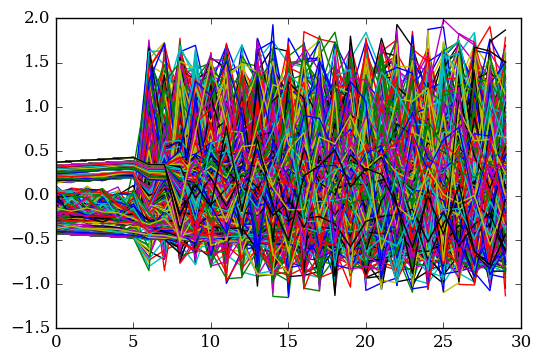

In [24]:
lab.plot(c[20:50])
lab.show()


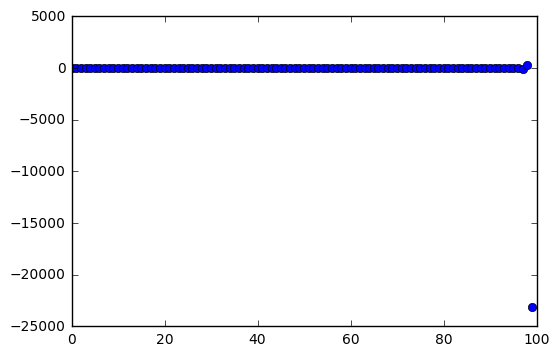

In [94]:
lab.plot(num.sum(vz[completeFrames-100:completeFrames],axis=1),'o')

In [10]:
rawData=DumpExtractorIncomplete("../KTuning/src/Slab111Z9DSFSurfaceTerm.dump",100,1080,0)
frames=100
[vxs,vys,vzs]=rawData["velocity"]
[xs,ys,zs]=rawData["position"]
[cs,ws]=rawData["chargeQV"]
[exs,eys,ezs]=rawData["electricField"]
[layerss,ass]=feam.Layers(zs,1080)
begin=0

eavzs=[]
eavxs=[]
eavys=[]
chavs=[]
zavs=[]
for counter in range(len(ass)):
    eavzs.append(num.sum(num.sum(ezs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    chavs.append(num.sum(num.sum(cs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavxs.append(num.sum(num.sum(exs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavys.append(num.sum(num.sum(eys[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    zavs.append(num.sum(num.sum(zs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))        
 

In [11]:
file="Slab111Z9"+"DSF.dump"
rawData=feam.DumpExtractor("../KTuning/src/"+file,100,1080,0)
[vxd,vyd,vzd]=rawData["velocity"]
[xd,yd,zd]=rawData["position"]
[cd,wd]=rawData["chargeQV"]
[exd,eyd,ezd]=rawData["electricField"]
[layerd,ad]=feam.Layers(zd,1080)
begin=0

eavzd=[]
eavxd=[]
eavyd=[]
chavd=[]
zavd=[]
    
for counter in range(len(ad)):
    eavzd.append(num.sum(num.sum(ezd[begin:,layerd[counter][0]],axis=1)/len(layerd[counter][0]))/(frames-begin))
    chavd.append(num.sum(num.sum(cd[begin:,layerd[counter][0]],axis=1)/len(layerd[counter][0]))/(frames-begin))
    eavxd.append(num.sum(num.sum(exd[begin:,layerd[counter][0]],axis=1)/len(layerd[counter][0]))/(frames-begin))
    eavyd.append(num.sum(num.sum(eyd[begin:,layerd[counter][0]],axis=1)/len(layerd[counter][0]))/(frames-begin))
    zavd.append(num.sum(num.sum(zd[begin:,layerd[counter][0]],axis=1)/len(layerd[counter][0]))/(frames-begin))        


In [12]:
file="Slab111Z9"+"Ewald.dump"
rawData=feam.DumpExtractor("../KTuning/src/"+file,100,1080,0)
[vxe,vye,vze]=rawData["velocity"]
[xe,ye,ze]=rawData["position"]
[ce,we]=rawData["chargeQV"]
[exe,eye,eze]=rawData["electricField"]
[layere,ae]=feam.Layers(zd,1080)
begin=0

eavze=[]
eavxe=[]
eavye=[]
chave=[]
zave=[]
for counter in range(len(ae)):
    eavze.append(num.sum(num.sum(eze[begin:,layere[counter][0]],axis=1)/len(layere[counter][0]))/(frames-begin))
    chave.append(num.sum(num.sum(ce[begin:,layere[counter][0]],axis=1)/len(layere[counter][0]))/(frames-begin))
    eavxe.append(num.sum(num.sum(exe[begin:,layere[counter][0]],axis=1)/len(layere[counter][0]))/(frames-begin))
    eavye.append(num.sum(num.sum(eye[begin:,layere[counter][0]],axis=1)/len(layere[counter][0]))/(frames-begin))
    zave.append(num.sum(num.sum(ze[begin:,layere[counter][0]],axis=1)/len(layere[counter][0]))/(frames-begin))        

    


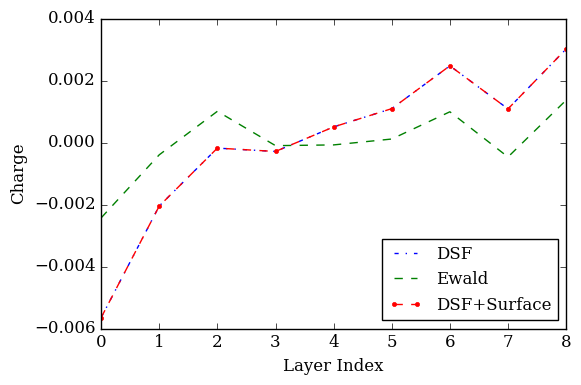

In [15]:
lab.plot(chavd,'-.',label="DSF")
lab.plot(chave,'--',label="Ewald")
lab.plot(chavs,'.--',label='DSF+Surface')
lab.xlabel("Layer Index")
lab.ylabel("Charge")
lab.legend(loc=4)
lab.show()

In [ ]:
def DumpExtractorIncompleteTest(filename,frames,atomNumber,atomPlate,dataOutPut):

    
    """
infoDict=DumpExtractor(filename,frames,atomNumber,atomPlate)


Function that extracts the information from the .dump file created by openmd
    
    
    Inputs:
  ===========
   
   
   filename:
   
               Path of the dump file from which the information is to be extracted
               
    frame:
    
                Total number of frames in the dump file
                
    atomNumber:
        
                Totla number of atoms in the slab or crystal
                
    atomPlate:
    
                Total number of atoms in the capacitor plates



    Outputs:
 =============
 
 infoDict:
 
         Dictonary containing position, velocity, chargeQV, electricField, plateEQV.
         Postion is a list of [x,y,z] and each x,y,z are array of x[frames][sites]
         velocity is a list of [vx,vy,vz] and each vx,vy,vz are array of vx[frames][sites]
         chargeQV is a lisf of [c,cv] and each c and cv are array of c[frame][sites]
         electric field is list of [ex,ey,ez] and each are array of ex[frame][sites]
         plateEQV is the list of [pex,pey,pez,pc,pcv] and each are array of pex[frames][sites]
"""    
    fileDump=open(filename)  #dump file for info extraction
    linesDump=fileDump.readlines()
    
    
    
    processP="Wait"
    processC="Wait"
    fileComplete= True
    try:
    
        if(linesDump[-1]!="</OpenMD>\n"):
            print("Error: Incomplete file")
            fileComplete=False
            #sys.exit();


        #information storage matrix 
        #posiiton and velocity storage
        x=num.zeros((frames,atomNumber))
        y=num.zeros((frames,atomNumber))
        z=num.zeros((frames,atomNumber))
        vx=num.zeros((frames,atomNumber))
        vy=num.zeros((frames,atomNumber))
        vz=num.zeros((frames,atomNumber))


        #charge and velocity storage matrix
        c=num.zeros((frames,atomNumber))
        cv=num.zeros((frames,atomNumber))
        ex=num.zeros((frames,atomNumber))
        ey=num.zeros((frames,atomNumber))
        ez=num.zeros((frames,atomNumber))
        pc=num.zeros((frames,atomPlate))
        pcv=num.zeros((frames,atomPlate))
        pex=num.zeros((frames,atomPlate))
        pey=num.zeros((frames,atomPlate))
        pez=num.zeros((frames,atomPlate))

        #frame count initilization
        fCount=0
        index=0  #index for the atoms
        for line in linesDump:
            linesSplit=str.split(line)
            length=len(linesSplit)

            if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
                processP="Start"
                continue;

            elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
                processP="Wait"
                index=0
                continue;

            elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
                processC="Start"
                continue;

            elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
                fCount=fCount+1
                index=0;
                processC="Wait"
                continue;

            elif(fCount>=frames):
                break;

            else:
                processP=processP;
                processC=processC;



            if (processP=="Start"):
                x[fCount][int(linesSplit[0])]=float(linesSplit[2])
                y[fCount][int(linesSplit[0])]=float(linesSplit[3])
                z[fCount][int(linesSplit[0])]=float(linesSplit[4])
                vx[fCount][int(linesSplit[0])]=float(linesSplit[5])
                vy[fCount][int(linesSplit[0])]=float(linesSplit[6])
                vz[fCount][int(linesSplit[0])]=float(linesSplit[7])

            if(processC=="Start"):
                if int(linesSplit[0])<atomNumber:
                    c[fCount][int(linesSplit[0])]=float(linesSplit[3])
                    cv[fCount][int(linesSplit[0])]=float(linesSplit[4])
                    ex[fCount][int(linesSplit[0])]=float(linesSplit[5])
                    ey[fCount][int(linesSplit[0])]=float(linesSplit[6])
                    ez[fCount][int(linesSplit[0])]=float(linesSplit[7])
                elif (int(linesSplit[0])==atomNumber and linesSplit[1]=="cwe"):
                    continue
                    c[fCount][int(linesSplit[0])]=float(linesSplit[2])
                    cv[fCount][int(linesSplit[0])]=float(linesSplit[3])
                    ex[fCount][int(linesSplit[0])]=float(linesSplit[4])
                    ey[fCount][int(linesSplit[0])]=float(linesSplit[5])
                    ez[fCount][int(linesSplit[0])]=float(linesSplit[6])
                else:
                    pc[fCount][int(linesSplit[1])]=float(linesSplit[3])
                    pcv[fCount][int(linesSplit[1])]=float(linesSplit[4])
                    pex[fCount][int(linesSplit[1])]=float(linesSplit[5])
                    pey[fCount][int(linesSplit[1])]=float(linesSplit[6])
                    
                    
                    
        position=[x,y,z]
        velocity=[vx,vy,vz]
        chargeQV=[c,cv]
        electricField=[ex,ey,ez]
        platesEQV=[pex,pey,pez,pc,pcv]

        infoDict={"position":position,"velocity":velocity,"chargeQV":chargeQV,"electricField":electricField,"platesEQV":platesEQV,"CFrame":fCount}
        return infoDict
    except:
        position=[x,y,z]
        velocity=[vx,vy,vz]
        chargeQV=[c,cv]
        electricField=[ex,ey,ez]
        platesEQV=[pex,pey,pez,pc,pcv]

        infoDict={"position":position,"velocity":velocity,"chargeQV":chargeQV,"electricField":electricField,"platesEQV":platesEQV,"CFrame":fCount-1}
        return infoDict
    
    

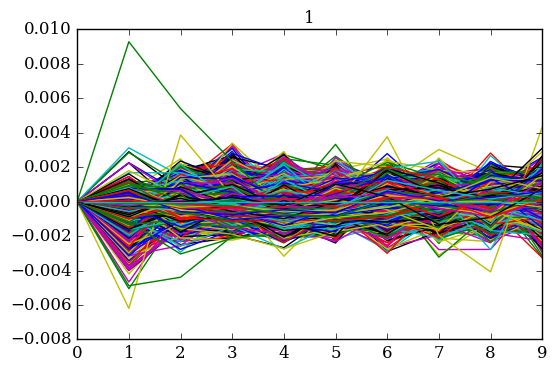

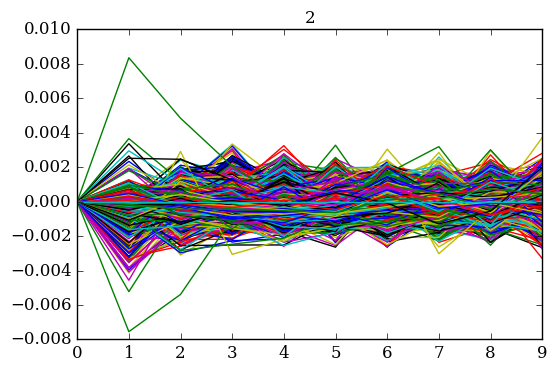

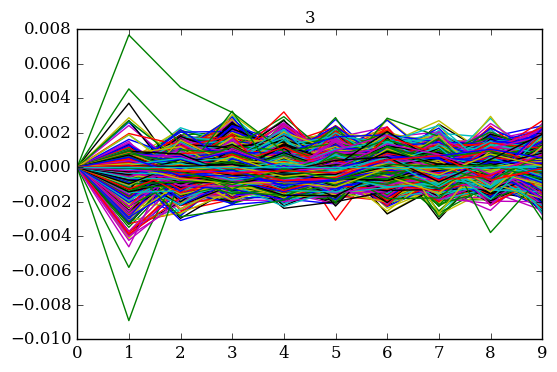

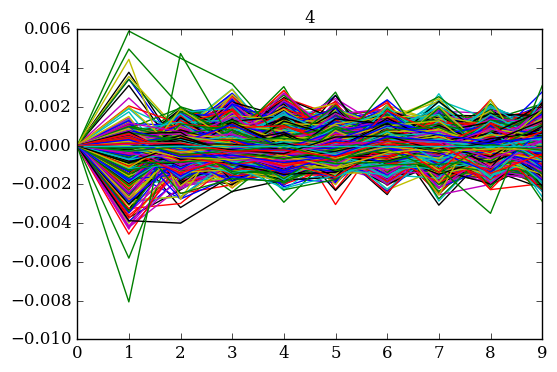

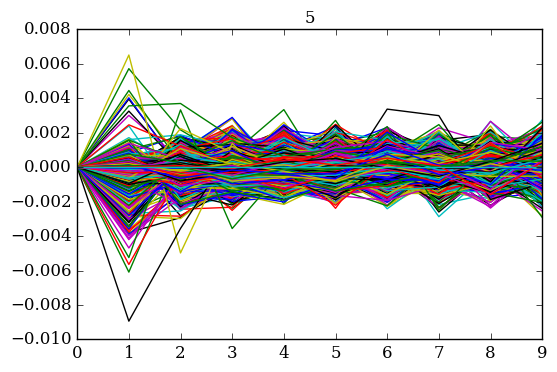

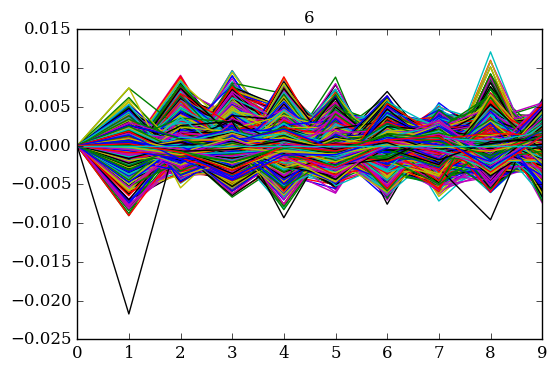

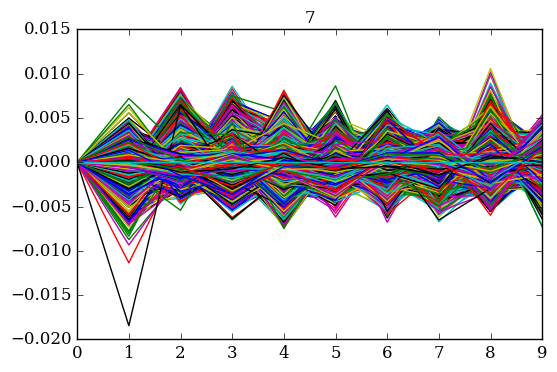

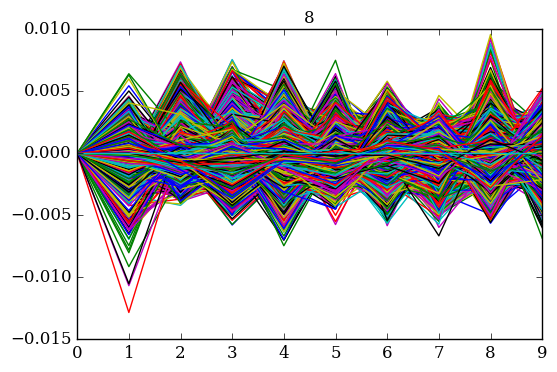

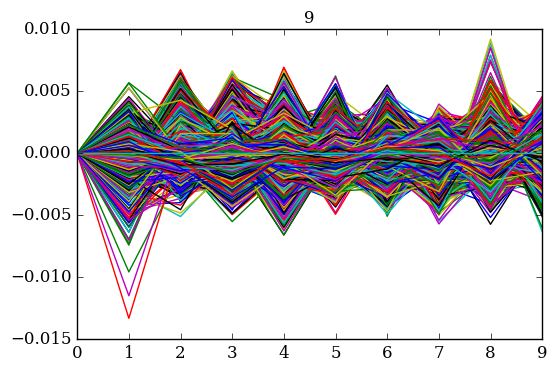

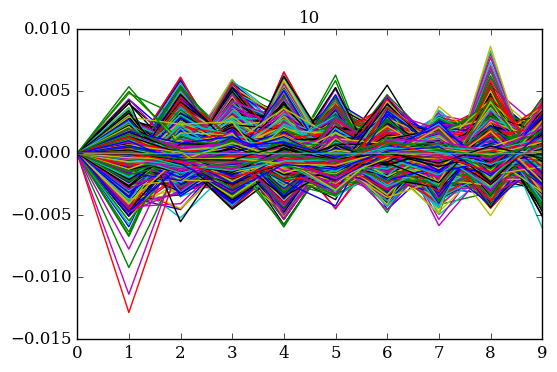

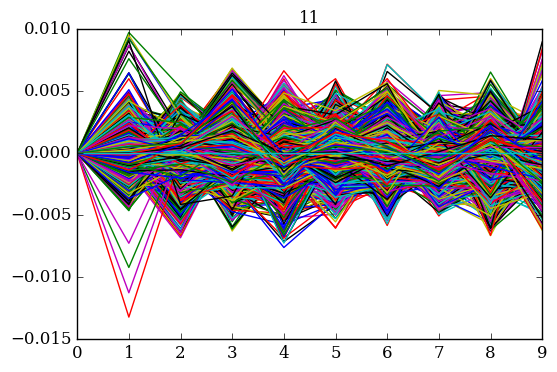

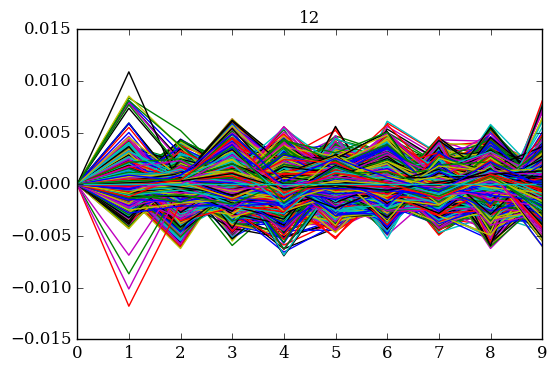

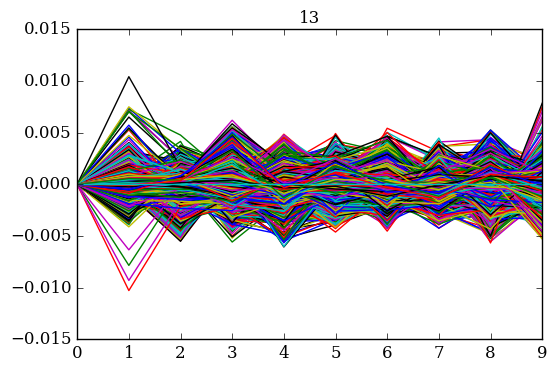

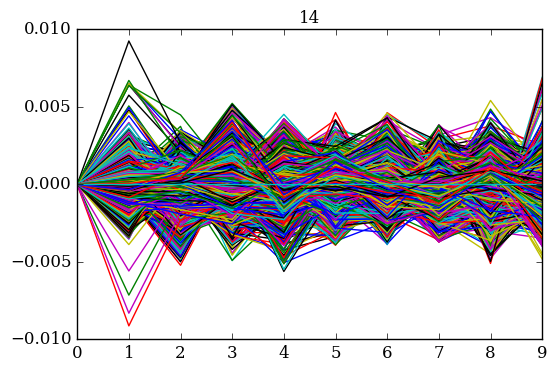

In [20]:
for count in range(1,15):
    file="../FDEAMCrystalCalculations/ImageCharge/hollow12LC%d.dump"%(count)
    rawData=feam.DumpExtractor(file,10,2881,0)
    [vxe,vye,vze]=rawData["velocity"]
    [xe,ye,ze]=rawData["position"]
    [ce,we]=rawData["chargeQV"]
    [exe,eye,eze]=rawData["electricField"]


    lab.plot(we)
    lab.title("%d"%(count))
    lab.show()

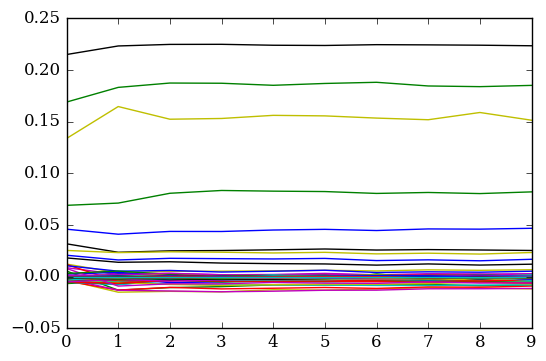

In [17]:
file="../FDEAMCrystalCalculations/ImageCharge/hollow12LC2.dump"
rawData=feam.DumpExtractor(file,10,2881,0)
[vxe,vye,vze]=rawData["velocity"]
[xe,ye,ze]=rawData["position"]
[ce,we]=rawData["chargeQV"]
[exe,eye,eze]=rawData["electricField"]


lab.plot(ce)
lab.show()